# Business Analytics 1 - Assingment 3

## Name: Atte Kohonen
## Student ID: 2101514

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn import preprocessing
import statsmodels.api as sm

## Exercise 1 - Exploratory data analysis of the supermarket dataset

In [2]:
#importing the file
supermarket = pd.read_csv('supermarket.csv', sep =';')
supermarket.head()


,Branch,Customer type,Gender,Quantity,Total,Payment,Income,Rating
0,A,Member,Female,7,548.9715,Ewallet,26.1415,9.1
1,C,Normal,Female,5,80.2200,Cash,3.8200,9.6
2,A,Normal,Male,7,340.5255,Credit card,16.2155,7.4
3,A,Member,Male,8,489.0480,Ewallet,23.2880,8.4
4,A,Normal,Male,7,634.3785,Ewallet,30.2085,5.3


### 1.1) Visualization with plots

**Exploratory data analysis: try to understand the different variables in the data. As part of this exploratory analysis, create visualizations that show the relationship between ’Total’ and the other variables (create at least 4 plots, you are free to create more if you think it can help in understating the problem), perform aggregation (check how average ’Total’ varies across categorical variables).**

<AxesSubplot:xlabel='Gender', ylabel='Total'>

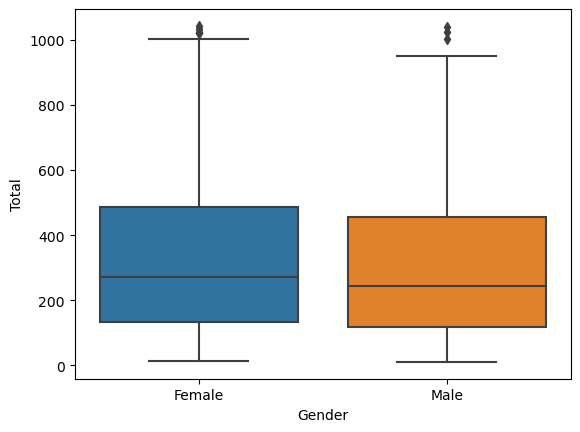

In [155]:
# Boxplot to illustrate the mean total purchase amount for both men and female.
# We can see that females have sligthly higher mean total purchase amount compared to men, around 300 dollars.
# Overall we can say that females total purchases are a bit higher. 
sns.boxplot(x=supermarket.Gender,y=supermarket.Total)


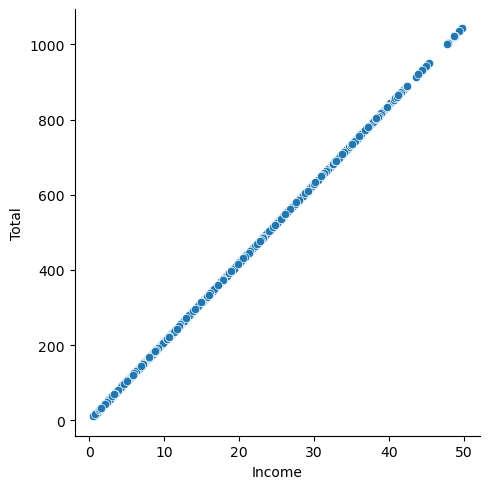

In [156]:
# Scatterplot to illustrate the relationship between income and total purchase amount.
# We can see that as the income gets higher so does the total purchase amount.

sns.relplot(x = 'Income', y = 'Total', kind = 'scatter', data = supermarket)

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

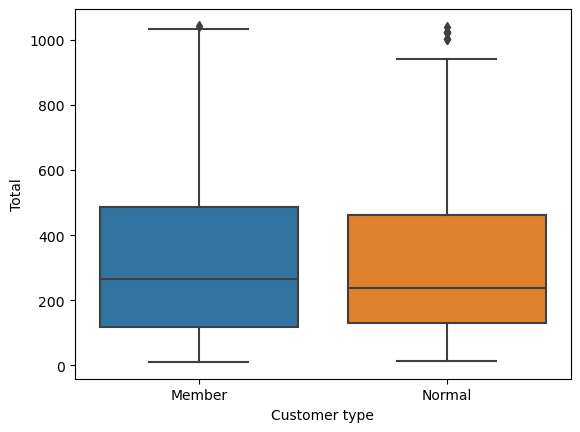

In [72]:
# Do members have higher total purchase amount than non-members?.
# As we can see from the boxplot, members tend to spend more money on purchases, atleast when you look at the  top 25%.
# However, the mean total purchases between members and normal customers is not significantly different. 
sns.boxplot(x = 'Customer type', y ='Total', data = supermarket)


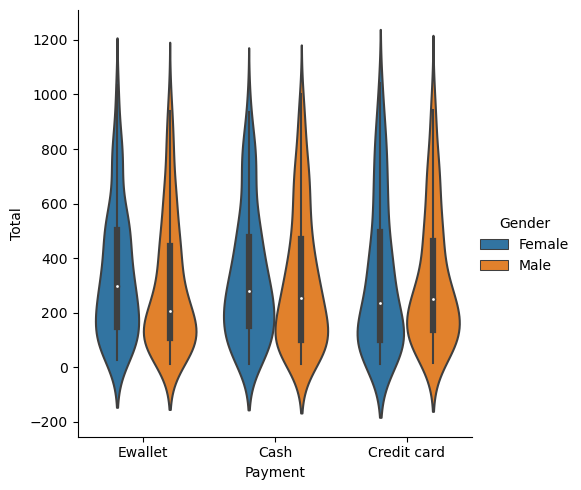

In [157]:
# What is the relationship between payment type, gender and total purchase? 
# Let's vizualize this with a violin plot. 
# We can see from the violin plot that women have higher mean purchases when using Ewallet and cash as a payment type.
# Men have slightly higher mean total purchases when using credit card. 

sns.catplot(x = 'Payment', y ='Total',kind ='violin', data = supermarket, hue ='Gender')

<AxesSubplot:xlabel='Branch', ylabel='Total'>

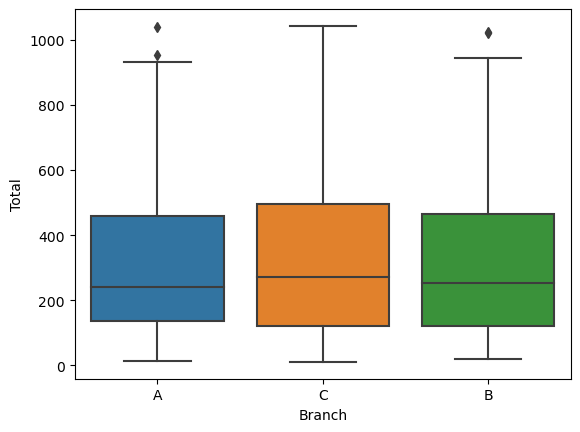

In [74]:
# Which branch has the highest mean total purchase?
# We can illustrate this with a boxplot. 
# Branch C has the highest mean total purchase and in general 
# customers have spend more money on that branch than in others.

sns.boxplot(x = 'Branch', y = 'Total',data = supermarket)

In [158]:
# We can also do some data aggregation on the categorical variables by using the groupby function.
# For example, we can see that female members tend to spend more money than male members on average.
supermarket[['Gender','Customer type','Payment','Total']].groupby(['Gender','Customer type','Payment']).mean()


Total
Gender Customer type Payment                
Female Member        Cash         332.381467
                     Credit card  344.482833
                     Ewallet      336.162426
       Normal        Cash         336.362250
                     Credit card  308.150548
                     Ewallet      349.887513
Male   Member        Cash         317.265173
                     Credit card  326.439238
                     Ewallet      307.022494
       Normal        Cash         317.564506
                     Credit card  310.615295
                     Ewallet      291.057500

### 1.2 ) Regression model

**Divide the data into training and test set: the training set should contain datapoints from branches A and B, and the test set from branch C. Develop a regression model using the training set that the company can use to predict the amount of purchase for a customer. Evaluate the performance for the test set.**

In [159]:
# We can create dummies of the categorical variables Customer type and gender and use this in the model.
supermarket = pd.get_dummies(data = supermarket, columns = ['Customer type'], drop_first = True)
supermarket = pd.get_dummies(data = supermarket,columns = ['Gender'],drop_first = True)

supermarket.head()

,Branch,Quantity,Total,Payment,Income,Rating,Customer type_Normal,Gender_Male
0,A,7,548.9715,Ewallet,26.1415,9.1,0,0
1,C,5,80.2200,Cash,3.8200,9.6,1,0
2,A,7,340.5255,Credit card,16.2155,7.4,1,1
3,A,8,489.0480,Ewallet,23.2880,8.4,0,1
4,A,7,634.3785,Ewallet,30.2085,5.3,1,1


In [160]:
# Checking the correlation of the variables in relation to the total purchase amount.
# In terms of the correlation we can see that especially Quantity and Income are highly correlated
# to the total purchase amount.
supermarket.corr()['Total']

Quantity                0.705510
Total                   1.000000
Income                  1.000000
Rating                 -0.036442
Customer type_Normal   -0.019670
Gender_Male            -0.049451
Name: Total, dtype: float64

In [161]:
# I have used Quantity, Income, Gender and Customer type as predictors when estimating the purchase amount 
# for a customer. 

# Selecting the training set
training = supermarket[(supermarket.Branch == 'A') | (supermarket.Branch == 'B')]
Branch_AB = training[['Quantity','Income','Gender_Male','Customer type_Normal']]

# Selecting the test set 
test = supermarket[(supermarket.Branch == 'C')]
Branch_C = test[['Quantity','Income','Gender_Male','Customer type_Normal']]

# Creating a linear regression object

regression = linear_model.LinearRegression()

# We can separete the predictors and the target for the model

training_X,training_Y = Branch_AB, training.Total

# Creating and training a regression model using the training set.

regressionmodel = regression.fit(Branch_AB,training.Total)

# We can print out the coefficient and intercept
intercept = regressionmodel.intercept_
coef = regressionmodel.coef_
print(intercept, coef)
print()

# Now we should be able to use the model to make predictions with the test set. 
# We can see that the predicted amounts of purchases are accurate to the original ones. 

predictions = regression.predict(Branch_C)
print(predictions[:5])
print(test['Total'][:5])

# Evaluating the performance of the model for the test set. 
# The R2-score tells us that the results are really accurate and that the variables used to make
# the prediction are good in relation to the outcome variable. 
regressionmodel.score(Branch_C,test.Total)

-5.684341886080802e-14 [3.97281273e-14 2.10000000e+01 2.19269047e-15 1.45161660e-14]

[ 80.22   627.6165 772.38   451.71   417.564 ]
1      80.2200
5     627.6165
7     772.3800
20    451.7100
34    417.5640
Name: Total, dtype: float64


1.0

In [162]:
# We can calculate the mean squared error. The mean squared error is rather small, meaning that there is not that much of
# errors.

print(mean_squared_error(test['Total'],predictions))

2.5427709507421716e-26


In [163]:
# We can also use statsmodel to estimate the coefficients of the model. We can see that the P-value is very low,
# highligthing the significance of the model. 
constant = sm.add_constant(training_X)
estimation = sm.OLS(training_Y,constant)
estimation2 = estimation.fit()
print(estimation2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.545e+32
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:59:49   Log-Likelihood:                 18987.
No. Observations:                 672   AIC:                        -3.796e+04
Df Residuals:                     667   BIC:                        -3.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.374e-13 

## 1.3 ) Coefficients of the final model


**By looking at the coefficients of your final model, would you say that, in general, (i) male or female customers spend more money in the supermarket; 
(ii) members of the loyalty program or normal customers spend more money?**

In [164]:
# By looking at the coefficients it seems that Males spend less money in the supermarket than females. Also members tend
# to spend more than normal customers. 

# Exercise 2 - classification model for a hotel


**In this assignment, your task is to create a classification model that can predict whether a reservation in a hotel will be canceled or not.**


In [165]:
#Importing the data 

hotel = pd.read_csv('hotel.csv', sep =';')
hotel.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,Room_Type 1,224,10,2,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,0,Room_Type 1,5,11,6,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,0,Room_Type 1,1,2,28,0,0,0,60.00,0,Canceled
3,2,0,0,2,0,Room_Type 1,211,5,20,0,0,0,100.00,0,Canceled
4,2,0,1,1,0,Room_Type 1,48,4,11,0,0,0,94.50,0,Canceled


### 2.1) Perform one-hot encoding on the categorical columns if any

In [166]:
# creating dummies for 'booking_status' and 'room_type_reserved' categorical columns
hoteldata = pd.get_dummies(data = hotel,columns =['room_type_reserved'],drop_first = False)
finaldata = pd.get_dummies(data = hoteldata,columns =['booking_status'],drop_first = True)
finaldata.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,avg_price_per_room,no_of_special_requests,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,booking_status_Not_Canceled
0,2,0,1,2,0,224,10,2,0,0,...,65.00,0,1,0,0,0,0,0,0,1
1,2,0,2,3,0,5,11,6,0,0,...,106.68,1,1,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2,28,0,0,...,60.00,0,1,0,0,0,0,0,0,0
3,2,0,0,2,0,211,5,20,0,0,...,100.00,0,1,0,0,0,0,0,0,0
4,2,0,1,1,0,48,4,11,0,0,...,94.50,0,1,0,0,0,0,0,0,0


### 2.2) Histograms of the columns lead time, and no of previous bookings not canceled. Removal of possible outliers. 



array([[<AxesSubplot:title={'center':'lead_time'}>]], dtype=object)

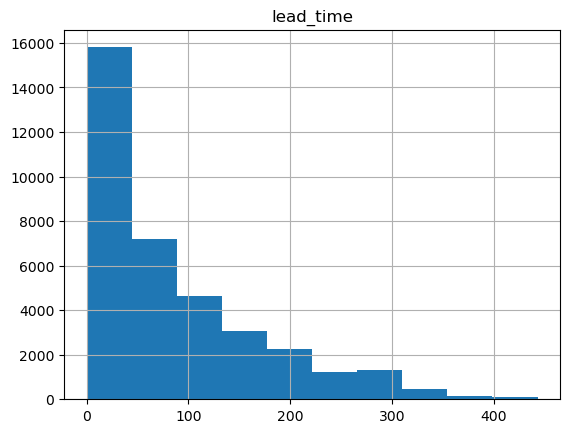

In [167]:
# Histogram of the 'lead time' column
finaldata.hist(column =['lead_time'])


array([[<AxesSubplot:title={'center':'no_of_previous_bookings_not_canceled'}>]],
      dtype=object)

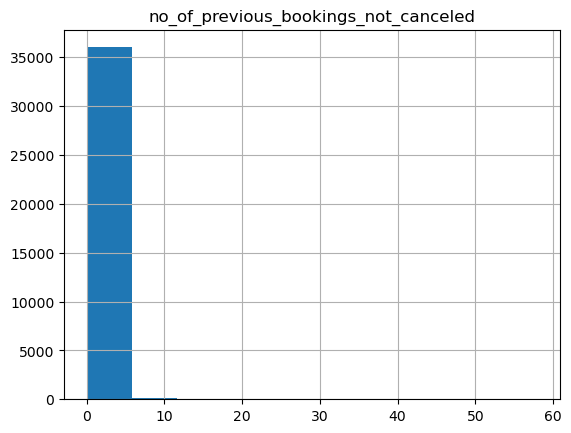

In [168]:
# histogram of the column 'no of previous bookings not canceled'
finaldata.hist(column =['no_of_previous_bookings_not_canceled'])

### 2.3) Replace any missing values you find

In [169]:
# Let's check the data for missing values.
# As we can see there are no missing values in the data. 
finaldata.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
room_type_reserved_Room_Type 1          0
room_type_reserved_Room_Type 2          0
room_type_reserved_Room_Type 3          0
room_type_reserved_Room_Type 4          0
room_type_reserved_Room_Type 5          0
room_type_reserved_Room_Type 6          0
room_type_reserved_Room_Type 7          0
booking_status_Not_Canceled             0
dtype: int64

### 2.4) logistic regression classification model with 'booking status' column as the target


**Build a logistic regression classification model with ’booking status’ column as the target, and using all other variables as predictors. Divide the data set into training (70 %) and test set (30 %), use random state = 0, and follow the process of building a classification model as discussed in the course.**

In [170]:
# First I look if there are any high correlations in the data.
# We can see that some of the rooms types are more correlated to customer not canceling
# the booking than other rooms. Also, it seems that if the customer is repeated guest it has a positive effect
# on not canceling the booking. Also customers making special requests seems to have somewhat strong correlation to not canceling
# the booking. 

finaldata.corr()[['booking_status_Not_Canceled']]

,booking_status_Not_Canceled
no_of_adults,-0.086920
no_of_children,-0.033078
no_of_weekend_nights,-0.061563
no_of_week_nights,-0.092996
required_car_parking_space,0.086185
lead_time,-0.438538
arrival_month,0.011233
arrival_date,-0.010629
repeated_guest,0.107287
no_of_previous_cancellations,0.033728


In [171]:
# Selecting the predictor variables
predict_X = finaldata[['no_of_adults','room_type_reserved_Room_Type 1','room_type_reserved_Room_Type 2','room_type_reserved_Room_Type 3','room_type_reserved_Room_Type 4','room_type_reserved_Room_Type 5','room_type_reserved_Room_Type 6','room_type_reserved_Room_Type 7','no_of_children','no_of_weekend_nights','no_of_week_nights','required_car_parking_space','lead_time','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']]

# Selecting the target 
target_X = finaldata.booking_status_Not_Canceled

In [172]:
# Creating training and test set
X_train,X_test,y_train,y_test = train_test_split(predict_X,target_X,test_size = 0.3,random_state = 0)

In [173]:
# Creating the model object
model = LogisticRegression(solver = 'lbfgs')


In [174]:
#Training the model with the predictors and outcome
model.fit(X_train, y_train)


/Users/atte/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [175]:
# Using the statsmodel package to analyze the outcome of the model
logit_model = sm.Logit(y_train,X_train)
outcome = logit_model.fit()
print(outcome)

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


/Users/atte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/atte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [176]:
# Making predictions with the test data

y_predict = model.predict(X_test)
y_predict[:10]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=uint8)

## 2.5) Confusion matrix

**Create the confusion matrix, calculate classification performance measures. What is the accuracy of the model on the test set?**

In [177]:
# Creating a classification report on the test set.
# We can see that the accuracy of the test set in this case is 77%.

testreport = classification_report(y_test,y_predict)
print(testreport)

              precision    recall  f1-score   support

           0       0.71      0.53      0.60      3574
           1       0.79      0.89      0.84      7309

    accuracy                           0.77     10883
   macro avg       0.75      0.71      0.72     10883
weighted avg       0.77      0.77      0.76     10883



## 2.6) Model performance
**Does the model perform similarly for the two possible categories of the outcome column, i.e. for hotel visits and cancelations? How many false positives do you find, i.e. guests who would visit the hotel but the model predicts that they would cancel the booking?**

In [178]:
# We can see that the model correctly identified 1883 cases where the customer canceled the booking (True positives)
# and 6529 cases where customer did not cancel the booking (True Negatives). In addition, we have 1691 cases where 
# customers where the model classified the customer to a non-canceling one, but in reality they canceled. 
# We can see from the model that there are 780 false positives, customers who were classified as if they had canceled
# the booking but in fact they did not cancel the booking. 
confusionmatrix = confusion_matrix(y_test,y_predict)
confusionmatrix

array([[1883, 1691],
       [ 780, 6529]])

# Exercise 3 - K-means clustering

**In this exercise you have to work with the data in the file ’iris.csv’, that contains 150 records of Iris flowers of three related species under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class (Species). In the data there are three different species present, 50 samples each. You have to perform clustering and assess whether clustering is able to distinguish the three different species.
Your task is to perform K-Means clustering on the dataset; in the model building process, do not use the column ’species’.**

In [179]:
# Importing the data

flowerdata = pd.read_csv('iris.csv')
flowerdata.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [180]:
# We can first check if there are any missing values in the data. In this case there are no
# missing values. 
flowerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 3.1) Determining the optimal number of clusters

**Determine the optimal number of clusters using the elbow method, and perform k-means clustering with the chosen value (set random state = 0).**

In [181]:
# Selecting the data for clustering

irisdata = flowerdata.drop('species',axis = 1)

# Scaling the data
irisdata_scaled = irisdata.apply(lambda x: preprocessing.scale(x))
flowerdata.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [182]:
# Using a foor loop to determine the optimal amount of clusters.

n_clusters = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 0)
    kmeans.fit(irisdata_scaled)
    n_clusters.append(kmeans.inertia_)


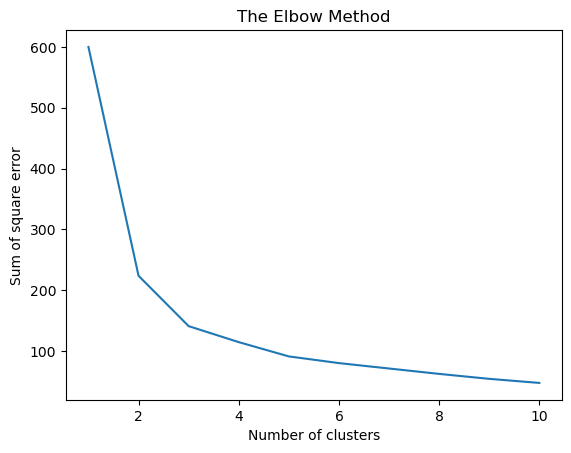

In [140]:
# Plotting the results to determine the optimal amount of clusters. 
plt.plot(range(1,11),n_clusters)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of square error')
plt.show()

# Based on the plot, I would say 3 clusters would be an optimal amount, 
# since after that the drop in sum of square errors is not that significant. 

## 3.2) What is the average of each variable in each cluster (the original, not the scaled variables)?

In [183]:
# Now we should be able to create a model with the optimal amount of clusters and make predictions. 
# After we have created the model, We can look at the averages. 

kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 0)

y_clust = kmeans.fit_predict(irisdata_scaled)

y_clust

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [184]:
# We should be able to see the averages of the original variables in the table below
irisdata.groupby(y_clust).mean()

,sepal_length,sepal_width,petal_length,petal_width
0,5.801887,2.673585,4.369811,1.413208
1,5.006000,3.418000,1.464000,0.244000
2,6.780851,3.095745,5.510638,1.972340


 ## 3.3) Clustering
**Perform k-means clustering now with k=3 (if this was not your selected k value). When you compare the resulting clusters with the original ’species’ column, you will find that one of the species is perfectly identified by clustering (i.e., one of the three clusters contains all the datapoints belonging to that species, and no datapoints from other species). Which one is the correctly identified species? When you look at the mean value of the variables, can you identify which variable(s) ’confuse’ the clustering model, i.e., which variables you think are responsible for the other two clusters being the mix of the other two species?**

In [185]:
# We can compare the original species column with the clustering results by usin crosstabulation function. 
# We can see that the 'Iris-setosa' specises is the correctly identified species with all the datapoints
# belonging to that species. 
pd.crosstab(flowerdata.species,y_clust)

col_0,0,1,2
species,,,
Iris-setosa,0,50,0
Iris-versicolor,39,0,11
Iris-virginica,14,0,36


In [186]:
irisdata.groupby(y_clust).mean()

,sepal_length,sepal_width,petal_length,petal_width
0,5.801887,2.673585,4.369811,1.413208
1,5.006000,3.418000,1.464000,0.244000
2,6.780851,3.095745,5.510638,1.972340


In [143]:
# When we look at the 'petal-width' column we can see that the mean value for the cluster 1 is clearly different from
# the others. For clusters 0 and 2 we can see that the difference is not that significant, and I believe
# the confusion happens here. It is also the same thing with the 'petal_length' variable and I belive that it is
# also confusing the clustering model. 